<a href="https://colab.research.google.com/github/Maureenchepkirui/IP-Week-4/blob/main/Moringa_Data_Science_Prep_W4_Independent_Project_2021_11_Maureen_Chepkirui_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**RESEARCH QUESTION**

Identify the most popular hour of the day for picking up a shared electric car (Bluecar) in the city of Paris over the month of April 2018.
What is the most popular hour for returning cars?
What station is the most popular?
Overall?
At the most popular picking hour?
What postal code is the most popular for picking up Blue cars? Does the most popular station belong to that postal code?
Overall?
At the most popular picking hour?
Do the results change if you consider Utilib and Utilib 1.4 instead of Blue cars? 

**Importing Python Libraries**

In [ ]:
#Importing  libraries that will be needed for the project

import pandas as pd
import numpy as np
from datetime import datetime

 **Reading the dataset from our csv file.**

In [ ]:
# Loading our dataset into the notebook
#url = '[http://bit.ly/Autolibdataset' given from external link site
Autolib = pd.read_csv('Autolib_dataset.csv')

## Let's preview the first 5 rows of our dataset
Autolib.head()

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,NaN,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,NaN,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,NaN,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,NaN,0,station,ok,nonexistent,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,NaN,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,NaN,1,station,ok,nonexistent,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,NaN,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,NaN,2,station,ok,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,NaN,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,NaN,3,station,ok,nonexistent,2018,4,8,17,23


**PREVIEWING DATASET**

In [ ]:
# Let's preview the last 5 rows of our dataset

Autolib.tail()


,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
4995,8 avenue MÃ©nelotte,2,2,0,0,0,nonexistent,Colombes,NaN,colombes-menelotte-8,STATION,"48.9246525, 2.259313",92700,Colombes/MÃ©nelotte/8,operational,NaN,3,station,ok,nonexistent,2018,4,6,11,26
4996,37 rue de Dantzig,4,4,0,0,1,operational,Paris,NaN,paris-dantzig-37,STATION,"48.8335103, 2.2987201",75015,Paris/Dantzig/37,operational,NaN,2,station,ok,nonexistent,2018,4,4,16,56
4997,142 rue du Bac,1,1,0,0,1,operational,Paris,NaN,paris-bac-142,STATION,"48.8508194, 2.3237968",75007,Paris/Bac/142,operational,NaN,4,station,ok,nonexistent,2018,4,1,7,1
4998,2 avenue du Val de Fontenay,2,2,0,0,0,nonexistent,Fontenay-Sous-Bois,NaN,fontenaysousbois-valdefontenay-2,STATION,"48.8528247, 2.4869085",94120,Fontenay-Sous-Bois/Val de Fontenay/2,operational,NaN,3,station,ok,nonexistent,2018,4,4,17,27
4999,5 Rue Henry Brisson,4,4,0,0,0,operational,Paris,NaN,paris-henrybrisson-5,STATION,"48.8984293, 2.3347923",75018,Paris/Henry Brisson/5,operational,NaN,0,station,ok,nonexistent,2018,4,8,10,2


**ACCESSING INFORMATION ABOUT THE DATASET**

In [ ]:
#Lets get the shape of our dataset

Autolib.shape

(5000, 25)

In [ ]:
#Get to know more information about our dataset example data types

Autolib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Address              5000 non-null   object
 1   Cars                 5000 non-null   int64 
 2   Bluecar counter      5000 non-null   int64 
 3   Utilib counter       5000 non-null   int64 
 4   Utilib 1.4 counter   5000 non-null   int64 
 5   Charge Slots         5000 non-null   int64 
 6   Charging Status      5000 non-null   object
 7   City                 5000 non-null   object
 8   Displayed comment    111 non-null    object
 9   ID                   5000 non-null   object
 10  Kind                 5000 non-null   object
 11  Geo point            5000 non-null   object
 12  Postal code          5000 non-null   int64 
 13  Public name          5000 non-null   object
 14  Rental status        5000 non-null   object
 15  Scheduled at         47 non-null     object
 16  Slots 

In [ ]:
#The line of code explains the sum of missing values per column

Autolib.isnull().sum()

Address                   0
Cars                      0
Bluecar counter           0
Utilib counter            0
Utilib 1.4 counter        0
Charge Slots              0
Charging Status           0
City                      0
Displayed comment      4889
ID                        0
Kind                      0
Geo point                 0
Postal code               0
Public name               0
Rental status             0
Scheduled at           4953
Slots                     0
Station type              0
Status                    0
Subscription status       0
year                      0
month                     0
day                       0
hour                      0
minute                    0
dtype: int64

**Cleaning our dataset**

In [ ]:
#The line of code explains the sum of missing values per column

Autolib.isnull().sum()

Address                0
Cars                   0
Bluecar counter        0
Utilib counter         0
Utilib 1.4 counter     0
Charge Slots           0
Charging Status        0
City                   0
ID                     0
Kind                   0
Geo point              0
Postal code            0
Public name            0
Rental status          0
Slots                  0
Station type           0
Status                 0
Subscription status    0
year                   0
month                  0
day                    0
hour                   0
minute                 0
dtype: int64

In [ ]:
#Let's remove use the str.strip function on the respective column name to strip the leading and trailing space 
# Also remove white spaces and convert the column names to lower case

Autolib.columns = Autolib.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
Autolib.tail(15)

,address,cars,bluecar_counter,utilib_counter,utilib_1.4_counter,charge_slots,charging_status,city,id,kind,geo_point,postal_code,public_name,rental_status,slots,station_type,status,subscription_status,year,month,day,hour,minute
4985,6 place du PrÃ©sident Mithouard,2,2,0,0,1,operational,Paris,paris-mithouard-6,STATION,"48.8512827, 2.3129161",75007,Paris/Mithouard/6,operational,4,station,ok,nonexistent,2018,4,4,2,35
4986,16 Rue Charles de Gaulle,3,3,0,0,0,nonexistent,Alfortville,alfortville-charlesdegaulle-16,STATION,"48.81456, 2.413135",94140,Alfortville/Charles de Gaulle/16,operational,3,station,ok,nonexistent,2018,4,3,4,3
4987,6 place Abel Gance,6,6,0,0,0,nonexistent,Boulogne-Billancourt,boulognebillancourt-abelgance-6,STATION,"48.833663, 2.258714",92100,Boulogne-Billancourt/Abel Gance/6,operational,0,station,ok,nonexistent,2018,4,8,6,41
4988,62 Rue Ramey,5,5,0,0,1,operational,Paris,paris-ramey-62,STATION,"48.8916426, 2.3449781",75018,Paris/Ramey/62,operational,1,station,ok,nonexistent,2018,4,8,11,0
4989,3 Rue Mongenot,4,4,0,0,0,operational,Saint-MandÃ©,saintmande-mongenot-3,STATION,"48.8435084, 2.4171838",94160,Saint-MandÃ©/Mongenot/3,operational,0,station,ok,nonexistent,2018,4,6,7,28
4990,47 boulevard de l'HÃ´pital,0,0,0,0,0,operational,Paris,paris-hopital-47,STATION,"48.84019, 2.362478",75013,Paris/HÃ´pital/47,operational,4,station,ok,nonexistent,2018,4,3,21,13
4991,56 avenue du MarÃ©chal de Lattre de Tassigny,5,5,0,0,0,nonexistent,CrÃ©teil,creteil-marechaldelattredetassigny-56,STATION,"48.79834, 2.455145",94000,CrÃ©teil/MarÃ©chal de Lattre de Tassigny/56,operational,1,station,ok,nonexistent,2018,4,7,20,43
4992,3 avenue d'Ivry,0,0,0,0,2,operational,Paris,paris-ivry-3,STATION,"48.82175, 2.36868",75013,Paris/Ivry/3,operational,6,station,ok,nonexistent,2018,4,9,23,1
4993,6 avenue Charles-de-Gaulle,6,6,0,0,0,nonexistent,Le Plessis-Robinson,leplessisrobinson-charlesdegaulle-6,STATION,"48.781849, 2.263931",92350,Le Plessis-Robinson/Charles-de-Gaulle/6,operational,0,station,ok,nonexistent,2018,4,2,4,43
4994,15 rue de Rocroy,0,0,0,0,0,operational,Paris,paris-rocroy-15,STATION,"48.8801236, 2.3509617",75010,Paris/Rocroy/15,operational,1,station,ok,nonexistent,2018,4,1,20,49


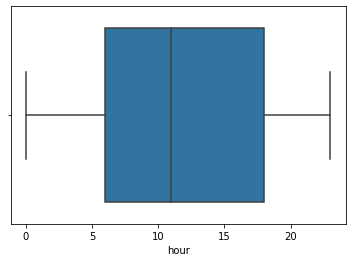

In [ ]:
#We can discover outliers using data visualization tools
#First import seaborn library
import seaborn as sns

#Plot the boxplot using one column .On this case we used bluecar_counter
sns.boxplot(x=Autolib['hour'])

In [ ]:
Q1 = Autolib.quantile(0.25)
Q3 = Autolib.quantile(0.75)

IQR = Q3 - Q1


(Autolib < (Q1 - 1.5 * IQR)) |(Autolib > (Q3 + 1.5 * IQR))


# The two commented lines of code below can be used to drop the outliers but for now I will not drop them since the data
#does not seem to have extreem outliers.This is due to the range of each column.

# Autolib_no_outlier = Electric[~((Autolib < (Q1 - 1.5 * IQR)) | (Autolib > (Q3 + 1.5 * IQR))).any(axis = 1)]

# print(Autolib_no_outlier)

,address,bluecar_counter,cars,charge_slots,charging_status,city,day,geo_point,hour,id,kind,minute,month,postal_code,public_name,rental_status,slots,station_type,status,subscription_status,utilib_1.4_counter,utilib_counter,year
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
3,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4996,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4997,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
#At this stage ,we check if the its true that the column cars and bluecar counter are the same as explained in the data glossary
def  number(row):
  if row['cars'] == row['bluecar_counter']:
    return 'True'
  else:
      return 'False'
#Apply the lambda function and create a new column with the new row
Autolib['Verifier_column']=Autolib.apply (lambda row: number(row), axis=1)
Autolib.head(10)

,address,cars,bluecar_counter,utilib_counter,utilib_1.4_counter,charge_slots,charging_status,city,id,kind,geo_point,postal_code,public_name,rental_status,slots,station_type,status,subscription_status,year,month,day,hour,minute,Verifier_column
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,2,station,ok,nonexistent,2018,4,8,11,43,True
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,0,station,ok,nonexistent,2018,4,6,7,24,True
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,1,station,ok,nonexistent,2018,4,3,20,14,True
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,2,station,ok,nonexistent,2018,4,4,4,37,True
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,3,station,ok,nonexistent,2018,4,8,17,23,True
5,8 Boulevard Voltaire,0,0,0,0,0,nonexistent,Paris,paris-voltaire-8,STATION,"48.8657658, 2.3664376",75011,Paris/Voltaire/8,operational,4,station,ok,nonexistent,2018,4,6,7,2,True
6,37 rue Leblanc,0,0,0,0,0,nonexistent,Paris,paris-citroencevennes-parking,PARKING,"48.83874, 2.27641",75015,Paris/CitroÃ«n CÃ©vennes/Parking,broken,0,station,closed,nonexistent,2018,4,8,18,20,True
7,17 Rue des Luaps ProlongÃ©e,3,3,1,0,0,nonexistent,Nanterre,nanterre-luaps-17,STATION,"48.88069, 2.21063",92000,Nanterre/Luaps/17,operational,0,station,ok,nonexistent,2018,4,4,22,13,True
8,34 avenue Jean Moulin,1,1,0,0,0,nonexistent,Paris,paris-jeanmoulin-34,STATION,"48.8266807, 2.3237355",75014,Paris/Jean Moulin/34,operational,4,station,ok,nonexistent,2018,4,2,22,58,True
9,41 boulevard de Rochechouart,6,6,0,0,0,nonexistent,Paris,paris-anvers-parking,PARKING,"48.88267, 2.34405",75009,Paris/Anvers/Parking,operational,0,station,ok,nonexistent,2018,4,4,15,2,True


In [ ]:
#This is to verify that the two columns are true.
len(Autolib[Autolib['Verifier_column'] == 'True'])
#All the rows under column name cars and blue-car counter are equal to each other

5000

In [ ]:
#Check if there are any null values.
#We had done this above and dropped all columns that have maximum number of missing values.
#To verify that dataset has no misiing values we use isnull function
Autolib.isnull().sum()

address                0
cars                   0
bluecar_counter        0
utilib_counter         0
utilib_1.4_counter     0
charge_slots           0
charging_status        0
city                   0
id                     0
kind                   0
geo_point              0
postal_code            0
public_name            0
rental_status          0
slots                  0
station_type           0
status                 0
subscription_status    0
year                   0
month                  0
day                    0
hour                   0
minute                 0
Verifier_column        0
dtype: int64

In [ ]:
# Duplicates are data points that are repeated in our dataset. 
# These should be simply removed.
#To check if our dataset has duplicate values, we use the duplicated function
Autolib.duplicated().sum()

#There are zero duplicates

0

In [ ]:
#Data Cleaning:None
# We had cleaned the data above. To confirm data types
Autolib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   address              5000 non-null   object
 1   cars                 5000 non-null   int64 
 2   bluecar_counter      5000 non-null   int64 
 3   utilib_counter       5000 non-null   int64 
 4   utilib_1.4_counter   5000 non-null   int64 
 5   charge_slots         5000 non-null   int64 
 6   charging_status      5000 non-null   object
 7   city                 5000 non-null   object
 8   id                   5000 non-null   object
 9   kind                 5000 non-null   object
 10  geo_point            5000 non-null   object
 11  postal_code          5000 non-null   int64 
 12  public_name          5000 non-null   object
 13  rental_status        5000 non-null   object
 14  slots                5000 non-null   int64 
 15  station_type         5000 non-null   object
 16  status

 **Identify the most popular hour of the day for picking up a shared electric car (Bluecar) in the city of Paris over the month of April 2018**

In [ ]:
#The most popular hour of the day for picking up a shared blue electric car in the city of paris in the month of april 2018
#First filter to only paris 
new_Autolib_paris = Autolib[Autolib['city'] =='Paris'] 
new_Autolib_paris

#Group by hour to find the most used bluecars
Paris_hour = new_Autolib_paris.groupby(['hour'])['bluecar_counter'].sum().diff().sort_values(ascending = False)
Paris_hour.head(1)

#The most popular hour is 21. It has the highest positive value

hour
21    119.0
Name: bluecar_counter, dtype: float64

In [ ]:
# Creating a new column where we find the difference in the number of bluecars at the station/counter

Autolib['bluecar_Diff'] = Autolib['bluecar_counter'].diff()
Autolib.head()

,address,cars,bluecar_counter,utilib_counter,utilib_1.4_counter,charge_slots,charging_status,city,id,kind,geo_point,postal_code,public_name,rental_status,slots,station_type,status,subscription_status,year,month,day,hour,minute,Verifier_column,bluecar_Diff
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,2,station,ok,nonexistent,2018,4,8,11,43,True,NaN
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,0,station,ok,nonexistent,2018,4,6,7,24,True,6.0
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,1,station,ok,nonexistent,2018,4,3,20,14,True,-3.0
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,2,station,ok,nonexistent,2018,4,4,4,37,True,0.0
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,3,station,ok,nonexistent,2018,4,8,17,23,True,0.0


In [ ]:
# What is the most popular hour for returning cars?


Autolib['total_cars'] = Autolib.iloc[:,2:4].sum(axis = 1)
Autolib.head()

,address,cars,bluecar_counter,utilib_counter,utilib_1.4_counter,charge_slots,charging_status,city,id,kind,geo_point,postal_code,public_name,rental_status,slots,station_type,status,subscription_status,year,month,day,hour,minute,Verifier_column,bluecar_Diff,total_cars
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,2,station,ok,nonexistent,2018,4,8,11,43,True,NaN,0
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,0,station,ok,nonexistent,2018,4,6,7,24,True,6.0,6
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,1,station,ok,nonexistent,2018,4,3,20,14,True,-3.0,3
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,2,station,ok,nonexistent,2018,4,4,4,37,True,0.0,4
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,3,station,ok,nonexistent,2018,4,8,17,23,True,0.0,3


In [ ]:
# What station is the most popular Overall?
#At the most popular picking hour?

Popular_station = Autolib.groupby(['id','hour'])['total_cars'].sum().sort_values(ascending = False)
Popular_station.head()

id                                   hour
courbevoie-paix-2                    2       15
paris-portedevilliers-28             8       15
saintouen-louisblanc-35              2       14
paris-claudebernard-16               4       14
fontenayauxroses-divisionleclerc-31  7       14
Name: total_cars, dtype: int64

In [ ]:
# What station is the most popular? At the most popular picking hour?
  
#Autolib_paris[(Autolib_paris['Kind'] == 'STATION') & (Autolib_paris['Status'] == 'ok') & (Autolib_paris['hour'] == 4)].groupby('Public name')['Public name'].count().sort_values(ascending= False)
## Subsetting the most popular picking hour (8)

Hour = Autolib[(Autolib.hour == 14)]
Hour.head()

,address,cars,bluecar_counter,utilib_counter,utilib_1.4_counter,charge_slots,charging_status,city,id,kind,geo_point,postal_code,public_name,rental_status,slots,station_type,status,subscription_status,year,month,day,hour,minute,Verifier_column,bluecar_Diff,total_cars
63,147 rue de Paris,3,3,0,0,0,nonexistent,Charenton-le-Pont,charentonlepont-paris-147,STATION,"48.82687, 2.405368",94220,Charenton-le-Pont/Paris/147,operational,0,station,ok,nonexistent,2018,4,2,14,38,True,0.0,3
80,4 Rue Lobau,0,0,0,0,0,nonexistent,Paris,paris-lobau-parking,PARKING,"48.85608, 2.35342",75004,Paris/Lobau/Parking,broken,0,station,closed,broken,2018,4,8,14,3,True,0.0,0
126,38 Rue RÃ©aumur,0,0,0,0,2,operational,Paris,paris-reaumur-38,STATION,"48.8653769, 2.3573678",75003,Paris/RÃ©aumur/38,operational,6,station,ok,nonexistent,2018,4,2,14,32,True,-1.0,0
129,19 Rue des Filles du Calvaire,1,1,1,0,1,operational,Paris,paris-fillesducalvaire-19,STATION,"48.8628, 2.3660304",75003,Paris/Filles du Calvaire/19,operational,1,station,ok,nonexistent,2018,4,5,14,51,True,-1.0,2
140,44 rue de Fontenay,2,2,0,1,0,nonexistent,Vincennes,vincennes-fontenay-44,STATION,"48.84779, 2.44345",94300,Vincennes/Fontenay/44,operational,0,station,ok,nonexistent,2018,4,7,14,50,True,1.0,2
